#### **This Performs Forward Sequential Feature selection on the PageRank filtered model, tuned for F1 Score**

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

The PageRank cutoff, cleaning parameters and model hyperparameters were all found through *Optuna*.

In [10]:
df = pd.read_csv("../../data/400-1800_with_raw_scaled_surface_pagerank.csv")
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status,PageRank
0,201210-1-00,293,400.22778,1765.6628,201210-1,Normal,0.610024
1,201210-1-00,294,400.91116,1774.7809,201210-1,Normal,0.610024
2,201210-1-00,295,401.59454,1769.0302,201210-1,Normal,0.610024
3,201210-1-00,296,402.27789,1756.4220,201210-1,Normal,0.610024
4,201210-1-00,297,402.96127,1758.8690,201210-1,Normal,0.610024
...,...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia,1.201164
6239201,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia,1.201164
6239202,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia,1.201164
6239203,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia,1.201164


Filter the least central spectra

In [11]:
df = df[df['PageRank'] > 0.974295111197113]
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status,PageRank
16392,201210-1-09,293,400.22778,2492.6379,201210-1,Normal,1.050074
16393,201210-1-09,294,400.91116,2491.0544,201210-1,Normal,1.050074
16394,201210-1-09,295,401.59454,2486.6711,201210-1,Normal,1.050074
16395,201210-1-09,296,402.27789,2493.6860,201210-1,Normal,1.050074
16396,201210-1-09,297,402.96127,2502.9224,201210-1,Normal,1.050074
...,...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia,1.201164
6239201,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia,1.201164
6239202,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia,1.201164
6239203,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia,1.201164


In [12]:
cleaning_params = {
    'despike': False,
    'baseline_correct': True,
    'smoothing': False,
    'scaling': 'snv',
    'despike_ma': 10,
    'despike_threshold': 7,
    'lam': 10**10,
    'p': 0.081,
    'window_size': 77,
    'poly_order': 5
}
spectra_cleaning(df, **cleaning_params)

df

c:\Users\FX 8320\Documents\final_year_project\2024-ca4021-bolgee25-goodwis6\Final_Results\..\Cleaning_and_Evaluation\cleaning_and_evaluation_functions.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: x - asls_baseline_correction(x, lam=lam, p=p))
c:\Users\FX 8320\Documents\final_year_project\2024-ca4021-bolgee25-goodwis6\Final_Results\..\Cleaning_and_Evaluation\cleaning_and_evaluation_functions.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status,PageRank
16392,201210-1-09,293,400.22778,1.573611,201210-1,Normal,1.050074
16393,201210-1-09,294,400.91116,1.560730,201210-1,Normal,1.050074
16394,201210-1-09,295,401.59454,1.516606,201210-1,Normal,1.050074
16395,201210-1-09,296,402.27789,1.599678,201210-1,Normal,1.050074
16396,201210-1-09,297,402.96127,1.707540,201210-1,Normal,1.050074
...,...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,-2.261378,210526-3,Hyperglycemia,1.201164
6239201,210526-3-09,2338,1797.72200,-2.052961,210526-3,Hyperglycemia,1.201164
6239202,210526-3-09,2339,1798.40550,-2.043384,210526-3,Hyperglycemia,1.201164
6239203,210526-3-09,2340,1799.08890,-1.926663,210526-3,Hyperglycemia,1.201164


In [13]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [14]:
wavelength_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,SurID,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-09,1.573611,1.560730,1.516606,1.599678,1.707540,1.738095,1.731571,1.613097,1.398695,1.438835,...,-0.805805,-0.931156,-0.986884,-1.138821,-0.849064,-0.898601,-0.675555,-1.137884,201210-1,Normal
201210-1-14,0.193540,0.196904,0.102359,-0.017984,0.009950,0.155262,0.135557,-0.011023,-0.058436,0.020800,...,-1.510800,-1.606151,-1.763803,-1.852719,-1.477025,-1.448017,-1.630805,-1.641494,201210-1,Normal
201210-1-15,0.504281,0.514191,0.498757,0.664477,0.649709,0.327322,0.217061,0.558070,0.495186,0.946501,...,-1.504335,-1.539344,-1.475232,-1.708626,-1.679671,-1.525069,-1.500708,-1.293958,201210-1,Normal
201210-1-16,0.676484,0.641991,0.557323,0.479647,0.438293,0.591317,0.987777,1.061440,0.658135,0.636769,...,-1.324388,-1.473400,-1.178257,-1.507606,-1.273225,-1.057252,-1.262062,-1.324075,201210-1,Normal
201210-1-17,1.016709,1.094907,1.137297,1.116094,1.056603,0.868139,0.617501,1.134054,1.162566,0.646663,...,-0.786396,-0.983883,-1.534342,-1.246000,-0.992049,-1.078725,-1.516486,-1.374626,201210-1,Normal


In [15]:
rf = RandomForestClassifier(random_state=1234, n_estimators=60, criterion='entropy')

In [16]:
evaluate_model(wavelength_df, rf)

RandomForestClassifier Cross-Validation Accuracy: 0.6643 +/- 0.0509
RandomForestClassifier Cross-Validation Precision: 0.6673 +/- 0.0525
RandomForestClassifier Cross-Validation Recall: 0.6727 +/- 0.0610
RandomForestClassifier Cross-Validation F1-Score: 0.6401 +/- 0.0404


---

##### **Greedy Feature Selection**

In [17]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Feature selector
sfs = SequentialFeatureSelector(rf,
                                k_features=(1, 50),
                                forward=True,
                                scoring='f1_macro',
                                cv=cv,
                                n_jobs=-1,
                                verbose=2)

# Fit the feature selector
sfs = sfs.fit(X, y, groups=groups)

# Get selected feature names
selected_feature_names = X[list(sfs.k_feature_names_)]

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(selected_feature_names.columns, columns=['Selected Features'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2049 out of 2049 | elapsed:  8.3min finished

[2024-04-20 03:32:09] Features: 1/50 -- score: 0.44284758447723627[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]:

In [23]:
selected_features_df

,WaveNumber
0,448.74716
1,491.11618
2,492.48291
3,517.76764
4,519.81775
5,641.45789
6,647.60822
7,650.34167
8,663.32574
9,716.62872


In [24]:
selected_features_df = selected_features_df.rename(columns={"Selected Features" : "WaveNumber"})

In [25]:
selected_features_df.to_csv("../../data/best_f1_features_selection.csv")

Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

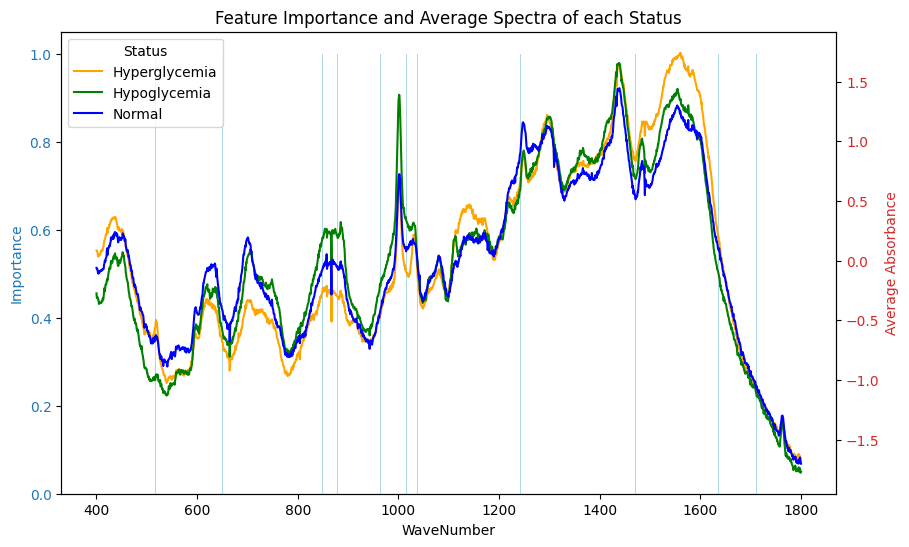

In [26]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(selected_features_df['WaveNumber'])
ax1.bar(selected_features_df['WaveNumber'], 1, color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()

In [27]:
help(SequentialFeatureSelector)

Help on class SequentialFeatureSelector in module mlxtend.feature_selection.sequential_feature_selector:

class SequentialFeatureSelector(mlxtend.utils.base_compostion._BaseXComposition, sklearn.base.MetaEstimatorMixin)
 |  SequentialFeatureSelector(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)
 |  
 |  Sequential Feature Selection for Classification and Regression.
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  k_features : int or tuple or str (default: 1)
 |      Number of features to select,
 |      where k_features < the full feature set.
 |      New in 0.4.2: A tuple containing a min and max value can be provided,
 |          and the SFS will consider return any feature combination between
 |          min and max that scored highest in cross-validation. For example,
 |          the tuple (1, 4) will 